In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats


In [22]:
genth = pd.read_csv('data/genetherapy.csv')

In [23]:
data = genth.copy()

In [83]:
samples= [list(frame) for group,frame in data.groupby('Therapy').expr]

In [84]:
samples

[[100, 96, 101, 95, 103, 99, 97, 96, 98, 106, 106, 104, 95, 95, 105],
 [100, 100, 95, 84, 101, 101, 95, 106, 105, 97, 103, 94, 94, 100, 107],
 [91, 96, 94, 96, 91, 85, 98, 93, 100, 85, 101, 101, 90, 98, 97],
 [92, 85, 95, 89, 91, 91, 99, 94, 97, 94, 87, 93, 96, 92, 90]]

In [116]:
def ravel(list_of_lists: list[list[float]]) -> list[float]:
    out = []
    for list_i in list_of_lists:
        out.extend(list_i)
    return out

def smean(group: list[float]) -> float:
    return sum(group) / len(group)

def SST(groups: list[list[float]]) -> float:
    rav = ravel(groups)
    tot_mean = smean(rav)
    tot_sst = 0
    for el in rav:
        tot_sst += (el - tot_mean)**2
    return tot_sst

def SSB(groups: list[list[float]]) -> float:
    tot_mean = smean(ravel(groups))
    tot_ssb = 0
    for group in groups:
        gm = smean(group)
        tot_ssb += len(group)*(gm - tot_mean)**2
    return tot_ssb

def SSW(groups: list[list[float]]) -> float:
    return sum([SST([group]) for group in groups])

def f_score(groups: list[list[float]]) -> float:
    N = len(ravel(groups))
    m = len(groups)
    return SSB(groups)/SSW(groups)*(N-m)/(m-1)        

In [125]:
def one_way(list_of_lists: list[list[float]]):
    N = len(ravel(list_of_lists))
    m = len(list_of_lists)
    print(f'SST: {SST(list_of_lists)}\nSSB: {SSB(list_of_lists)}\nSSW: {SSW(list_of_lists)}')
    print(f'df_b: {m-1}\ndf_w: {N-m}')
    print(f'f-score: {f_score(list_of_lists)}')

In [126]:
list_of_lists = [[3, 1, 2], [5, 3, 4], [7, 6, 5]]
print(list_of_lists)
one_way(list_of_lists)

[[3, 1, 2], [5, 3, 4], [7, 6, 5]]
SST: 30.0
SSB: 24.0
SSW: 6.0
df_b: 2
df_w: 6
f-score: 12.0


In [127]:
one_way(samples)

SST: 1862.9833333333331
SSB: 560.7166666666667
SSW: 1302.2666666666669
df_b: 3
df_w: 56
f-score: 8.037302481143987


In [85]:
stats.f_oneway(*samples)

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

In [48]:
classes = data['Therapy'].unique()

In [79]:
sets = dict()
for ch in set(data['Therapy'].values):
    mask = data['Therapy'] == ch
    sets[ch] = data[mask]

In [26]:
sets['A']

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A
5,99,A
6,97,A
7,96,A
8,98,A
9,106,A


In [19]:
sets['B']

,expr,Therapy
15,100,B
16,100,B
17,95,B
18,84,B
19,101,B
20,101,B
21,95,B
22,106,B
23,105,B
24,97,B


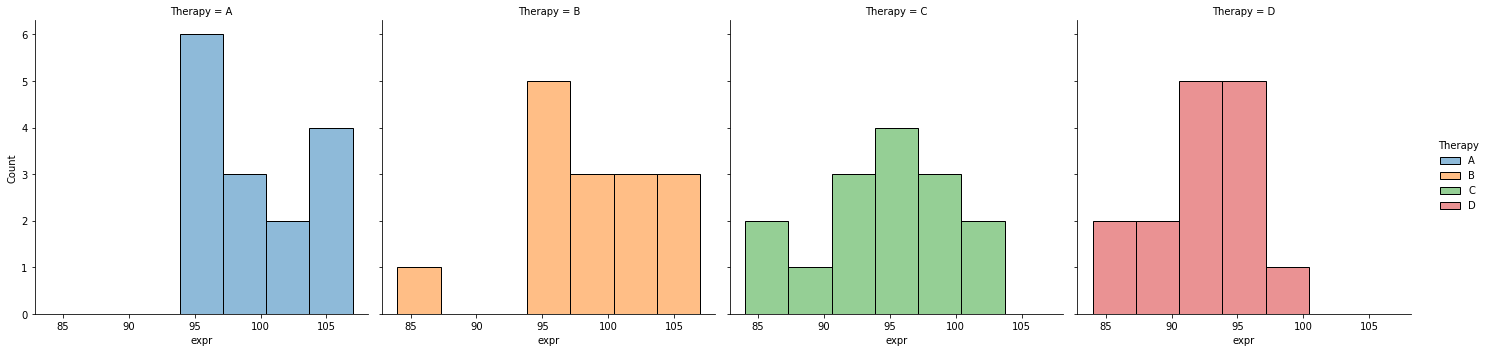

In [33]:
sns.displot(data=genth, x="expr",  hue="Therapy", col="Therapy")

In [87]:
for ch in classes:
    cur = sets[ch].expr
    print(f'{ch}: mean {cur.mean():4.1f}, median {cur.median():5.1f}, sd {cur.std():3.1f} '
          f'count {cur.count()}')

A: mean 99.7, median  99.0, sd 4.2 count 15
B: mean 98.8, median 100.0, sd 5.9 count 15
C: mean 94.4, median  96.0, sd 5.2 count 15
D: mean 92.3, median  92.0, sd 3.7 count 15


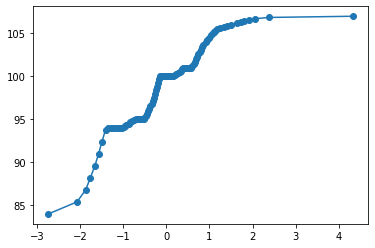

In [66]:
a = np.random.normal(0, 1, 1000)
b = sets['B'].expr

percs = np.linspace(0, 100, 101)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)

plt.plot(qn_a,qn_b,  marker="o")